# SC2001 Project 1 (Lab Group A33, Group 1)
## Integration of Mergesort & Insertion Sort


> In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. <br><br>
> Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.


In [246]:
# Imports
import time
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed to ensure that our data does not change in the future.
np.random.seed(10)

### a) Algorithm Implementation

> Implement the above hybrid algorithm.

In [247]:
# Create an Object to store the Number of Key Comparisons in our Sorting Methods
class KeyComparisons:
    def __init__(self):
        self.numKeyComparisons = 0

    def isALargerThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a > b

    def isALessThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a < b

    def isAEqualB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a == b

    def incrementKeyComparisons(self, incrementValue):
        self.numKeyComparisons += incrementValue

    def resetKeyComparisons(self):
        self.numKeyComparisons = 0
        
    def returnKeyComparisons(self):
        return self.numKeyComparisons
        

# Declaring a Constant for Fixed Threshold Value
def FIXED_THRESHOLD_VALUE():
    return 10

### Insertion Sort

In [248]:
def insertionSort(arr, comparisonsObject):
    
    # Traverse for each element from index 1 to end of list. First element can be ignored.
    for i in range(1, len(arr)):
        key = arr[i] # Pick out the element at the i-th position
        j = i-1 # j will be the running index for all the elements before elem
        
        while j >= 0 and comparisonsObject.isALessThanB(key, arr[j]): # While it hasn't reached the first element and the key is smaller than the previous elements, we will shift the j-th element to the j+1-th position
            # comparisonsObject.incrementKeyComparisons(1)
            arr[j+1] = arr[j]
            j -= 1
        # comparisonsObject.incrementKeyComparisons(1)
        
        
        arr[j+1] = key # If we reach an element that is smaller than the key or the start of the list (j=-1), we will insert the key to the right of that element or at index 0 if it reached start of list.
    return arr

### Hybrid Sort

In [249]:
# Merge function which will be used in the hybrid sort when merge sort is chosen over insertion sort.

def merge(arr1, arr2, comparisonsObject):
    # initialise indices for each array
    i = 0
    j = 0
    
    # initialise final sorted array
    sorted_arr = []
    
    # While both halves are not empty, we compare the 1st elements of the 2 lists
    while i != len(arr1) and j != len(arr2):
        # Keeping track of the Number of Comparisons
        # comparisonsObject.incrementKeyComparisons(1)
        # if first element of 1st list is smaller, 1st element of first half joins the end of the merged list
        if comparisonsObject.isALessThanB(arr1[i], arr2[j]):
            sorted_arr.append(arr1[i])
            i += 1
        # else if 1st element of 2nd list is smaller, move the 1st element of 2nd half to the end of the merged list
        elif arr2[j] < arr1[i]:
            sorted_arr.append(arr2[j])
            j += 1
        # else if they are equal, move both the 1st element of the first list and the second list to the merged list
        else:
            sorted_arr.append(arr1[i])
            sorted_arr.append(arr2[j])
            i += 1
            j += 1
    # if first list still has elements, copy all the elements in the first list to the merged list
    while i != len(arr1):
        sorted_arr.append(arr1[i])
        i += 1
    # if second list still has elements, copy all the elements in the second list to the merged list
    while j != len(arr2):
        sorted_arr.append(arr2[j])
        j += 1
    return sorted_arr

In [252]:
# Hybrid Sort takes in parameters of an array and array size limit S.
# If array size is <= S, insertion sort will be used 
# If array size is > S , merge sort will be used instead

def hybridSort(arr,S, comparisonsObject):
    # Base case. Array has 1 element.
    if len(arr) <= 1:
        return arr
    
    # Recursive step
    
    # Merge Sort 
    if len(arr) > S:
        # Use the middle element to divide the array into two halves
        m = len(arr)//2
        # Sort first half recursively
        arr[:m] = hybridSort(arr[:m],S, comparisonsObject)
        # Sort second half recursively
        arr[m:] = hybridSort(arr[m:], S, comparisonsObject)
        arr = merge(arr[:m], arr[m:], comparisonsObject)
        return arr
    
    # Insertion Sort
    else:
        arr = insertionSort(arr, comparisonsObject)
        return arr

### Testing the sorting algorithms


In [253]:
arr = [4,2,10,100,3,59,43,-1,-8,0,7,12,11,3,3,3]
comparisonsObject = KeyComparisons()   

print(hybridSort(arr, 3, comparisonsObject))

[-8, -1, 0, 2, 3, 3, 3, 3, 4, 7, 10, 11, 12, 43, 59, 100]


## b) Generate input data

> Generate arrays of increasing sizes, in a range from
1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [254]:
# Generate the required sizes of the arrays programatically from the range of 1,000 to 10 million.

inputDataSizes = []

for i in range(10):
    inputDataSizes.append((i+1) * 1000)
    inputDataSizes.append((i+1) * 10000)
    inputDataSizes.append((i+1) * 100000)
    inputDataSizes.append((i+1) * 1000000)

# Remove duplicates and sort the input data sizes
inputDataSizes = sorted(set(inputDataSizes))
print(inputDataSizes)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [255]:
# List of List of data
inputData = []

# Iterate through the data sizes array
for s in inputDataSizes:
    # For each datasize, we generate a random data array of size (s), each array will contain random integers from 1 to s.
    data = np.random.randint(1,s+1,size = s)
    inputData.append(data)
    
# Checking for the array of size 1000 that the generation was done correctly.    
for i in range(len(inputData)):
    print("Array Size: ", len(inputData[i]))
    print("Min of this array:" , min(inputData[i]))
    print("Max of this array:" , max(inputData[i]))
    print()

Array Size:  1000
Min of this array: 1
Max of this array: 999

Array Size:  2000
Min of this array: 3
Max of this array: 1998

Array Size:  3000
Min of this array: 2
Max of this array: 2998

Array Size:  4000
Min of this array: 1
Max of this array: 4000

Array Size:  5000
Min of this array: 3
Max of this array: 4999

Array Size:  6000
Min of this array: 1
Max of this array: 5999

Array Size:  7000
Min of this array: 1
Max of this array: 6999

Array Size:  8000
Min of this array: 2
Max of this array: 7999

Array Size:  9000
Min of this array: 4
Max of this array: 9000

Array Size:  10000
Min of this array: 2
Max of this array: 10000

Array Size:  20000
Min of this array: 1
Max of this array: 19999

Array Size:  30000
Min of this array: 1
Max of this array: 30000

Array Size:  40000
Min of this array: 1
Max of this array: 39998

Array Size:  50000
Min of this array: 3
Max of this array: 50000

Array Size:  60000
Min of this array: 1
Max of this array: 59999

Array Size:  70000
Min of thi

### c) Analyse Time Complexity

#### Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case.

c)i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [265]:
# Fix the Threshold Value S
thresholdValueS = FIXED_THRESHOLD_VALUE()

# Create Arrays to store X and Y Coordinates
fixedThresholdXCoordinates = []
fixedThresholdYCoordinates = []

# Run Hybrid Sort over each Individual Array
for array in inputData:
    copyOfArray = copy.deepcopy(array)
    arrayLength = len(copyOfArray)
    print("Current Array Size: {}".format(arrayLength))
    
    # Create Timestamps to track the time taken for the Hybrid Sort to sort this Array
    startTimestamp = time.time()
    hybridSort(copyOfArray, thresholdValueS, comparisonsObject)
    endingTimestamp = time.time()

    # Record the KeyComparisons (Y) and Different Threshold Values S(X)
    numKeyComparisons1 = comparisonsObject.returnKeyComparisons()
    fixedThresholdXCoordinates.append(arrayLength)
    fixedThresholdYCoordinates.append(numKeyComparisons1)

    # Print Time Taken & Num Key Comparisons
    print("Time Elapsed for Hybrid Sort: {0:.4f} seconds".format(endingTimestamp - startTimestamp))
    print("Number of Key Comparisons: {}".format(numKeyComparisons1))
    
    # Reset the Number of Key Comparisons for Next Array
    comparisonsObject.resetKeyComparisons()



Current Array Size: 1000
Time Elapsed for Hybrid Sort: 0.0040 seconds
Number of Key Comparisons: 8729
Current Array Size: 2000
Time Elapsed for Hybrid Sort: 0.0093 seconds
Number of Key Comparisons: 19517
Current Array Size: 3000
Time Elapsed for Hybrid Sort: 0.0145 seconds
Number of Key Comparisons: 30386
Current Array Size: 4000
Time Elapsed for Hybrid Sort: 0.0199 seconds
Number of Key Comparisons: 43080
Current Array Size: 5000
Time Elapsed for Hybrid Sort: 0.0255 seconds
Number of Key Comparisons: 56566
Current Array Size: 6000
Time Elapsed for Hybrid Sort: 0.0322 seconds
Number of Key Comparisons: 66799
Current Array Size: 7000
Time Elapsed for Hybrid Sort: 0.0377 seconds
Number of Key Comparisons: 80063
Current Array Size: 8000
Time Elapsed for Hybrid Sort: 0.0438 seconds
Number of Key Comparisons: 94045
Current Array Size: 9000
Time Elapsed for Hybrid Sort: 0.0498 seconds
Number of Key Comparisons: 108492
Current Array Size: 10000
Time Elapsed for Hybrid Sort: 0.0564 seconds
Nu

Text(0.5, 1.0, 'Graph of number of Key Comparisons against different Input List Sizes N')

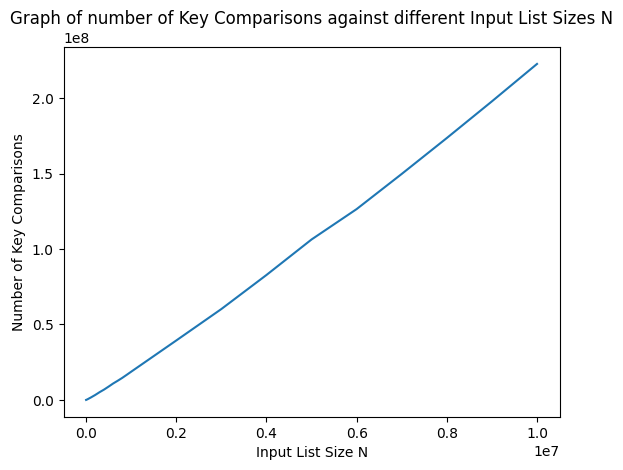

In [266]:
## Plot the Graph using Matplotlib
# Plot the Points
plt.plot(fixedThresholdXCoordinates, fixedThresholdYCoordinates)

# Naming the Axes
plt.xlabel("Input List Size N")
plt.ylabel("Number of Key Comparisons")
plt.title("Graph of number of Key Comparisons against different Input List Sizes N")

#### Compare Empirical Results with Theoretical Analysis for Time Complexity

c)ii) With the value of N fixed, plot the number of key comparisons over different sizes of the threshold value S. Compare your empirical results with your theoretical analysis of the time complexity.

In [262]:
def determineOptimalThreshold(initialThreshold, selectedArray, potentialThresholdValueArray, potentialThresholdTimesArray, fixedArraySizeXCoordinates, fixedArraySizeYCoordinates, inputData):
    # Array to store the Time Elapsed for each Threshold Value
    thresholdArray = []

    # Run Hybrid Sort after changing threshold value
    numThresholdValues = len(inputData)
    thresholdValueS = initialThreshold

    for i in range(numThresholdValues):
        # Create a Copy of Array
        copiedArray = copy.deepcopy(selectedArray)
        # Increment to change the thresholdValueS
        thresholdValueS += 5
        print("Current Threshold Value: {}".format(thresholdValueS))
        
        # Track the Time Elapsed for Hybrid Sort
        start = time.time()
        hybridSort(copiedArray, thresholdValueS, comparisonsObject)
        end = time.time()

        # Record the KeyComparisons (Y) and Different Threshold Values S(X)
        numKeyComparisons2 = comparisonsObject.returnKeyComparisons()
        fixedArraySizeXCoordinates.append(thresholdValueS)
        fixedArraySizeYCoordinates.append(numKeyComparisons2)
        
        # Show Time Elapsed & Num Key Comparisons
        timeElapsed1 = end - start
        thresholdArray.append(timeElapsed1)
        print("Time Elapsed: {0:.4f} seconds".format(timeElapsed1))
        print("Number of Key Comparisons: {}".format(numKeyComparisons2))
        comparisonsObject.resetKeyComparisons()

    # Determine the Optimal Threshold
    minTimeElapsed1 = min(thresholdArray)
    indexOfOptimalThreshold = thresholdArray.index(minTimeElapsed1)
    optimalThreshold = initialThreshold + (indexOfOptimalThreshold+1)*10
    
    # Append to List and Print Optimal Results
    potentialThresholdTimesArray.append(minTimeElapsed1)
    potentialThresholdValueArray.append(optimalThreshold)
    print("Optimal Threshold: {}".format(optimalThreshold))
    print("Time Taken for Optimal Threshold: {0:.4f}".format(minTimeElapsed1))

# Choose an Array to fix the Array Size
selectedArray = inputData[4]
# selectedArray = np.random.randint(1,300+1,size = 300)
print("This is Array Length: {}".format(len(selectedArray)))
# Array to store the list of potential optimal threshold values and their minimum times
testArray1 = []
testArray2 = []

# Create Arrays to store X and Y Coordinates
fixedArraySizeXCoordinates = []
fixedArraySizeYCoordinates = []

determineOptimalThreshold(0, selectedArray, testArray1, testArray2, fixedArraySizeXCoordinates, fixedArraySizeYCoordinates, inputData)


This is Array Length: 5000
Current Threshold Value: 5
Time Elapsed: 0.0272 seconds
Number of Key Comparisons: 53772
Current Threshold Value: 10
Time Elapsed: 0.0258 seconds
Number of Key Comparisons: 56566
Current Threshold Value: 15
Time Elapsed: 0.0253 seconds
Number of Key Comparisons: 56566
Current Threshold Value: 20
Time Elapsed: 0.0262 seconds
Number of Key Comparisons: 64961
Current Threshold Value: 25
Time Elapsed: 0.0263 seconds
Number of Key Comparisons: 64961
Current Threshold Value: 30
Time Elapsed: 0.0265 seconds
Number of Key Comparisons: 64961
Current Threshold Value: 35
Time Elapsed: 0.0267 seconds
Number of Key Comparisons: 64961
Current Threshold Value: 40
Time Elapsed: 0.0318 seconds
Number of Key Comparisons: 84939
Current Threshold Value: 45
Time Elapsed: 0.0319 seconds
Number of Key Comparisons: 84939
Current Threshold Value: 50
Time Elapsed: 0.0318 seconds
Number of Key Comparisons: 84939
Current Threshold Value: 55
Time Elapsed: 0.0316 seconds
Number of Key Com

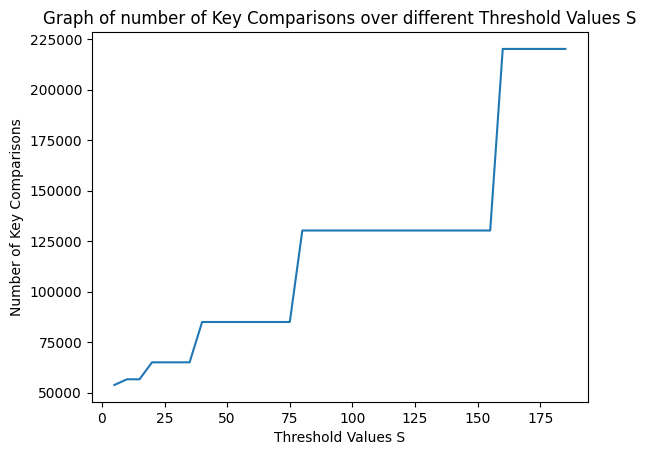

In [264]:
## Plot the Graph
# Plot the Points
plt.plot(fixedArraySizeXCoordinates, fixedArraySizeYCoordinates)

# Naming the Axes
plt.xlabel("Threshold Values S")
plt.ylabel("Number of Key Comparisons")
plt.title("Graph of number of Key Comparisons over different Threshold Values S")
plt.show()

c) iii) Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

In [270]:
# Array to store the list of potential optimal threshold values and their minimum times
potentialThresholdValueArray = []
potentialThresholdTimesArray = []

# Create Arrays to store X and Y Coordinates
fixedArraySizeXCoordinates2 = []
fixedArraySizeYCoordinates2 = []

# For a given input data size, vary the threshold value S to determine the optimal threshold value for this Dataset
for i in range(20):
    array1 = []
    array2 = []
    determineOptimalThreshold(0, inputData[i], potentialThresholdValueArray, potentialThresholdTimesArray, array1, array2, inputData)
    fixedArraySizeXCoordinates2.append(array1)
    fixedArraySizeYCoordinates2.append(array2)

# The most frequent (mode) threshold value is the optimum threshold value
modeThreshold = max(set(potentialThresholdValueArray), key=potentialThresholdValueArray.count)
print(modeThreshold)


Current Threshold Value: 5
Time Elapsed: 0.0043 seconds
Number of Key Comparisons: 8429
Current Threshold Value: 10
Time Elapsed: 0.0041 seconds
Number of Key Comparisons: 8729
Current Threshold Value: 15
Time Elapsed: 0.0039 seconds
Number of Key Comparisons: 9099
Current Threshold Value: 20
Time Elapsed: 0.0043 seconds
Number of Key Comparisons: 9879
Current Threshold Value: 25
Time Elapsed: 0.0041 seconds
Number of Key Comparisons: 9879
Current Threshold Value: 30
Time Elapsed: 0.0040 seconds
Number of Key Comparisons: 9879
Current Threshold Value: 35
Time Elapsed: 0.0046 seconds
Number of Key Comparisons: 12946
Current Threshold Value: 40
Time Elapsed: 0.0047 seconds
Number of Key Comparisons: 12946
Current Threshold Value: 45
Time Elapsed: 0.0046 seconds
Number of Key Comparisons: 12946
Current Threshold Value: 50
Time Elapsed: 0.0045 seconds
Number of Key Comparisons: 12946
Current Threshold Value: 55
Time Elapsed: 0.0046 seconds
Number of Key Comparisons: 12946
Current Threshold

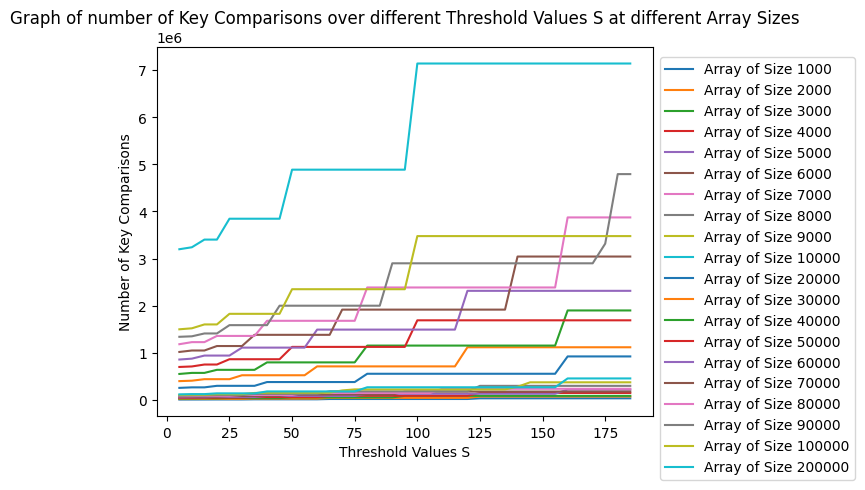

The Optimum Threshold is 30


In [279]:
# Determine the Index of the Optimal Value
optimalThresholdIndex = potentialThresholdValueArray.index(modeThreshold)

# Plot the Graph
for graph in range(len(fixedArraySizeXCoordinates2)):
    plt.plot(fixedArraySizeXCoordinates2[graph], fixedArraySizeYCoordinates2[graph], label = "Array of Size {}".format(len(inputData[graph])))

plt.xlabel("Threshold Values S")
plt.ylabel("Number of Key Comparisons")
plt.title("Graph of number of Key Comparisons over different Threshold Values S at different Array Sizes")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.4))
plt.show()

# Print the Optimum Threshold Value
print("The Optimum Threshold is", modeThreshold)

### d) Compare with Original Mergesort: Implement the original mergesort. Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. Use the optimal value of S obtained in (c) for this task